# Clean and Handle missing data

In [1]:
import pandas as pd
import numpy as np
myData = pd.read_csv('smartphones.csv')

In [2]:
myData.drop(columns=['Unnamed: 0'], inplace=True)
# بما أن عمود معلومات الجهاز هو الذي يحتوي على مواصفات الجهاز إذن يجب حذف الصفوف الفارغة التي لا تحتوي على معلومات لهذا الهاتف لانه بدون هذه المعلومات لن يكون لدينا سوا السعر و الكمية المتبقية من جهاز غير معلوم
myData = myData.dropna(subset=['Device_information'])

In [3]:
myData

,Price_after_discount,Price_before_discount,Remaining_quantity,Device_information,Discount_rate
0,569,AED 649.00,متبقية 3 فقط,شاومي ريدمي نوت 14 هاتف ثنائي الشريحة 8 غيغابا...,خصم 12%
1,547,NaN,متبقية 1 فقط,شاومي ريدمي نوت 14 هاتف ثنائي الشريحة 8 غيغابا...,NaN
3,949,"AED 1,249.00",متبقية 3 فقط,هاتف سامسونج جالاكسي A36 الذكي، 128 جيجابايت، ...,خصم 24%
4,699,AED 749.00,متبقية 3 فقط,أوبو A60 هاتف ثنائي الشريحة 6 جيغا رام ، سعة...,NaN
5,"1,045","AED 2,500.00",متبقية 1 فقط,سامسونغ غالاسكي هاتف أ 36 الذكي، 256 غيغابايت ...,خصم 58%
...,...,...,...,...,...
883,479,NaN,متبقية 1 فقط,Motorola MotoG15 Dual SIM 4G (8+128) RAM 128GB...,NaN
886,910,NaN,متبقية 1 فقط,MOTOROLA Edge 50 Fusion 5G Dual SIM 12GB RAM ...,NaN
888,529,NaN,متبقية 1 فقط,Motorola MotoG15 Dual SIM 4G (8+256) RAM 256GB...,NaN
893,399,NaN,متبقية 1 فقط,Motorola Moto G35 5G 4GB RAM 128GB ROM Leaf G...,NaN


In [4]:
import re

# Function of cleaning the price and remaining products and extracting the number
def extract_price(value):
    if pd.isna(value):
        return None
    value = str(value)
    # Remove characters like AED or commas
    value = re.sub(r'[^\d.,]', '', value)
    value = value.replace(',', '') # Remove the comma between thousands
    try:
        return float(value)
    except:
        return None

# تطبيق الدالة على الأعمدة
myData['Price_after_discount'] = myData['Price_after_discount'].apply(extract_price)
myData['Price_before_discount'] = myData['Price_before_discount'].apply(extract_price)
myData['Remaining_quantity'] = myData['Remaining_quantity'].apply(extract_price)
# تحويل القيم إلى int مع استثناء القيم المفقودة (None أو NaN)
myData['Remaining_quantity'] = myData['Remaining_quantity'].astype('Int64')

myData['Discount_rate'] = myData['Discount_rate'].str.replace('خصم', '', regex=False)
myData.head()

,Price_after_discount,Price_before_discount,Remaining_quantity,Device_information,Discount_rate
0,569.0,649.0,3,شاومي ريدمي نوت 14 هاتف ثنائي الشريحة 8 غيغابا...,12%
1,547.0,NaN,1,شاومي ريدمي نوت 14 هاتف ثنائي الشريحة 8 غيغابا...,NaN
3,949.0,1249.0,3,هاتف سامسونج جالاكسي A36 الذكي، 128 جيجابايت، ...,24%
4,699.0,749.0,3,أوبو A60 هاتف ثنائي الشريحة 6 جيغا رام ، سعة...,NaN
5,1045.0,2500.0,1,سامسونغ غالاسكي هاتف أ 36 الذكي، 256 غيغابايت ...,58%


In [5]:

def extract_device_name(device_info):
    import re

    if not isinstance(device_info, str):
        return None

    # توحيد الكتابة وتحويلها لحروف صغيرة
    device_info = device_info.lower()

    # قائمة العلامات التجارية (براندات)
    brands_dict = {
        'apple': ['apple', 'أبل', 'آيفون', 'ايفون', 'iphone'],
        'samsung': ['samsung', 'سامسونج', 'سامسونغ', 'galaxy', 'غالاكسي', 'جالاكسي'],
        'xiaomi': ['xiaomi', 'شاومي', 'redmi', 'ريدمي'],
        'oppo': ['oppo', 'أوبو'],
        'realme': ['realme'],
        'vivo': ['vivo'],
        'huawei': ['huawei', 'هواوي'],
        'honor': ['honor', 'هونر','هونور'],
        'motorola': ['motorola', 'moto','موتورولا'],
        'infinix': ['infinix'],
        'tecno': ['tecno'],
        'nokia': ['nokia'],
        'HMD':['أتش أن دي','أتش أم دي','إتش أم دي','إتش إم دي'],
        'Oneplus ':['Oneplus ACE']
    }

    # استخراج البراند
    brand = None
    for key, variants in brands_dict.items():
        for variant in variants:
            if re.search(rf'\b{variant}\b', device_info):
                brand = key.capitalize()  # توحيد الشكل
                break
        if brand:
            break

    # استخراج الموديل (باستخدام أنماط معروفة: A36, Note 14, S25 Ultra ...)
    model_pattern = r'((?:a|note|n|p|s|m|c|nova|reno|x|v|y|z|edge|flip|fold|نوت|اكس|بي|جي|اس|مي|ايه|سكاي لاين|بلس برو|فيوجن|أورا|كريست ماكس|ماجيك في|إكس|ايدج|ACE)\s?\d{1,3}[a-zA-Zأ-ي]*\+?(?:\s?(?:pro|plus|ultra|fusion|fold|برو|سي))?)'
    model_match = re.search(model_pattern, device_info, re.IGNORECASE)
    model = model_match.group(0).strip().replace("  ", " ") if model_match else ""

    # معالجة خاصة لبعض القيم مثل "x9", "a3", "m 256"
    if not brand and model:
        # محاولة تخمين البراند حسب كلمات مفتاحية
        if re.search(r'realme|c\d+', device_info): brand = "Realme"
        elif re.search(r'redmi|note', device_info): brand = "Xiaomi"
        elif re.search(r'iphone|أبل|apple', device_info): brand = "Apple"
        elif re.search(r'honor|هونر', device_info): brand = "Honor"
        elif re.search(r'moto|motorola', device_info): brand = "Motorola"

    # النتيجة النهائية
    name = f"{brand} {model}".strip() if brand else model if model else None
    return name

In [6]:

import re

def extract_ram_and_storage(text):
    if not isinstance(text, str):
        return {'ram': None, 'storage': None}

    ram = None
    storage = None

    # 1. أولاً: (8+256) أو ( 8 + 256 )
    match = re.search(r'\s*(\d{1,2})\s*\+\s*(\d{2,4})\s*', text)
    if match:
        ram = int(match.group(1))
        storage = int(match.group(2))
        return {'ram': ram, 'storage': storage}

    # البحث عن نمط مثل 8/256 أو 12/512
    match = re.search(r'\b(\d{1,2})\s*/\s*(\d{2,4})\b', text)
    if match:
        ram = int(match.group(1))
        storage = int(match.group(2))
        return {'ram': ram, 'storage': storage}

    # استخراج الأرقام + الوحدات (GB أو TB وما يعادلها بالعربية)
    matches = re.findall(
        r'(\d+(?:\.\d+)?)\s*(جيجابايت|غيغا|جيجا|غيغابايت|GB|جيغا|جيغابايت|تيرابايت|تيرا|TB)\s*(RAM|رام|روم|ROM)?',
        text,
        flags=re.IGNORECASE
    )

    for amount, unit, label in matches:
        amount = float(amount)

        # تحويل TB إلى GB
        if unit.lower() in ['تيرابايت', 'تيرا', 'tb']:
            amount *= 1024

        label = label.lower() if label else ''

        if 'ram' in label or 'رام' in label:
            if ram is None or amount < ram:
                ram = int(amount)
        elif amount >= 64:
            if storage is None or amount > storage:
                storage = int(amount)
        else:
            if ram is None and amount <= 32:
                ram = int(amount)

    return {'ram': ram, 'storage': storage}


In [7]:
def extract_color(device_info):
    import re
    device_info = str(device_info)
    # استخراج لون الجهاز
    # قائمة الألوان الشائعة
    common_colors = [
        'أسود الفضاء','أسود', 'أبيض', 'أزرق', 'أحمر', 'أخضر', 'رمادي', 'فضي', 'ذهبي', 'بنفسجي',
        'زهري', 'وردي', 'برتقالي', 'بني', 'كحلي', 'تركواز', 'بيج', 'نحاسي', 'سماوي','الخزامى',
        'أصفر', 'تيتانيوم', 'مارز', 'نجمي', 'فاتح', 'غامق','ازرق دنيم','ميدنايت','نعناعي','ازرق',
        'black', 'white', 'blue', 'red', 'green', 'gray', 'silver', 'gold', 'purple',
        'pink', 'orange', 'brown', 'navy', 'turquoise', 'beige', 'copper', 'sky','midnight',
        'pantone poinciana',"cyan lake",'soothing sea','ocean cyan','forest grey','gravity grey',
        'زيتوني','جرافيت','ستارلايت','برونز','برونزي','موكا','الليموني','أرجواني','خوخي','غرافيت','عنابي','سوثينغ سيا'
        ,'فانتوم بلاك','أيسي بلو','كريم'
    ]

    # اللون
    color = None

    # 1. داخل فواصل (_) مثل: _أزرق نجمي_
    match = re.search(r'_([أ-يa-zA-Z\s]+)_', device_info)
    if match:
        color = match.group(1).strip()


    # 2. بعد كلمة "باللون" أو "اللون"
    if not color:
        match = re.search(r'(?:باللون|اللون|لون)\s+([أ-يa-zA-Z]+(?:\s+[أ-يa-zA-Z]+)*)', device_info)
        if match:
            color = match.group(1).strip()


    # 3. فحص الألوان الشائعة
    if not color:
        for c in common_colors:
            if re.search(rf'\b{re.escape(c)}(?:\s+[أ-يa-zA-Z]+)?\b', device_info, re.IGNORECASE):
                match = re.search(rf'({c}(?:\s+[أ-يa-zA-Z]+)?)', device_info, re.IGNORECASE)
                color_candidate = match.group(1).lower() if match else None
                if color_candidate:
                    color = color_candidate.strip()
                    break

    # 4. في نهاية النص بعد "-" أو "،"
    if not color:
        compound_match = re.search(r'[-، ]\s*([أ-يa-zA-Z]+(?:\s+[أ-يa-zA-Z]+)+)$', device_info)
        if compound_match:
            color = compound_match.group(1).strip()


     # 4. آخر محاولة: تفحص النص كله بحثًا عن مطابقة جزئية مع الألوان
    if not color:
        for c in common_colors:
            if c in device_info:
                color = c
    return color

In [8]:
def extract_version(device_info):

    version_match = re.search(
        r'((?:آيفون|أيفون|iPhone|أ|آ|جي|G|A|Y|S|Reno|Note|Galaxy|Moto|Redmi|Poco|Nova|OPPO|Vivo|Honor)'
        r'[\s\-]?\d{1,3}[A-Za-z]*)',
        device_info,
        re.IGNORECASE
    )
    version = version_match.group(1).strip() if version_match else None


    if not version:
        extra_match = re.search(
            r'((?:Note|Galaxy|Edge|Pura|X|نوت|هونر|ايه|V|اس|بيورا|شاومي|زي|فليب|فولد|أس|أورا|إيدج|واي|C|نوفا|أونر|رينو|رازر)\s?\d{1,3}[A-Za-z]*(?:\s?(?:Pro|Ultra|Plus|Fusion|Fold|برو))?)',
            device_info,
            re.IGNORECASE
        )
        version = extra_match.group(1).strip() if extra_match else None

    return version

In [9]:
# الكود الاساسي
def extract_info(device_info):
    import re
    device_info = str(device_info) if not isinstance(device_info, str) else device_info

    # اسم الجهاز
    name = extract_device_name(device_info)

   #استخراج RAM
    ram, storage = extract_ram_and_storage(device_info).values()


   # استخراج الجيل
    generation_match = re.search(r'(5G|4G|3G|5 ?جي|4 ?جي|3 ?جي|جيل 4|جيل خامس|جيل 5|جيل 5|الجيل الخامس|الجيل الرابع|الجيل الثالث)', device_info, re.IGNORECASE)
    generation = generation_match.group(0) if generation_match else None

    # استخراج لون الجهاز
    color = extract_color(device_info)

    # الاصدار
    version = extract_version(device_info)


    return [name, ram, storage, generation, color, version]

# تطبيق الدالة على العمود
myData[['Device_name', 'RAM', 'Storage', 'generation','color','version']] = pd.DataFrame(myData['Device_information'].apply(extract_info).tolist(), index=myData.index)

# عرض البيانات الجديدة
myData.head(20)

,Price_after_discount,Price_before_discount,Remaining_quantity,Device_information,Discount_rate,Device_name,RAM,Storage,generation,color,version
0,569.0,649.0,3,شاومي ريدمي نوت 14 هاتف ثنائي الشريحة 8 غيغابا...,12%,Xiaomi نوت 14,8.0,256,4G,أخضر ليموني,نوت 14
1,547.0,NaN,1,شاومي ريدمي نوت 14 هاتف ثنائي الشريحة 8 غيغابا...,NaN,Xiaomi نوت 14,8.0,256,4G,أزرق محيطي,نوت 14
3,949.0,1249.0,3,هاتف سامسونج جالاكسي A36 الذكي، 128 جيجابايت، ...,24%,Samsung a36,6.0,128,5G,أبيض رائع,A36
4,699.0,749.0,3,أوبو A60 هاتف ثنائي الشريحة 6 جيغا رام ، سعة...,NaN,Oppo a60,6.0,256,5G,أزرق محيطي,A60
5,1045.0,2500.0,1,سامسونغ غالاسكي هاتف أ 36 الذكي، 256 غيغابايت ...,58%,Samsung,8.0,256,5جي,أبيض ثنائي,أ 36
6,279.0,379.0,3,سامسونغ غلاكسي A06 هاتف ثنائي الشريحة 4 غيغابا...,26%,Samsung a06,4.0,64,4 جي,ذهبي,A06
7,870.0,1000.0,1,سامسونغ غالاسكي هاتف أ 26 الذكي، 256 غيغابايت ...,13%,Samsung,8.0,256,5جي,أسود,أ 26
8,349.0,459.0,3,سامسونغ A06 ثنائي الشريحة 4 غيغا رام 128 غيغا ...,24%,Samsung a06,4.0,128,4G,أزرق فاتح,A06
9,468.0,549.0,2,موتورولا موتو جي 15 ثنائي الشريحة 8 جيغا رام 2...,15%,Motorola جي 15,8.0,256,4G,رمادي جاذبي,جي 15
10,1369.0,1499.0,2,سامسونج جالكسي A56 الذكي، 256 جيجابايت، وردي أ...,NaN,Samsung a56,8.0,256,الجيل الخامس,وردي أوسوم,A56


In [10]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 895
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price_after_discount   612 non-null    float64
 1   Price_before_discount  398 non-null    float64
 2   Remaining_quantity     598 non-null    Int64  
 3   Device_information     612 non-null    object 
 4   Discount_rate          308 non-null    object 
 5   Device_name            599 non-null    object 
 6   RAM                    516 non-null    float64
 7   Storage                612 non-null    int64  
 8   generation             600 non-null    object 
 9   color                  612 non-null    object 
 10  version                544 non-null    object 
dtypes: Int64(1), float64(3), int64(1), object(6)
memory usage: 58.0+ KB


In [11]:
#  DeviceName تنطيف
def combine_name_version(name, version):
    if pd.isna(name) and pd.isna(version):
        return None
    if pd.isna(name):
        return version
    if pd.isna(version):
        return name
    # التأكد أن النسخة لا تكرر محتوى الاسم
    if version.lower() in name.lower():
        return name
    return f"{name} {version}"

# تطبيق الدمج على البيانات
myData['DeviceName'] = myData.apply(lambda row: combine_name_version(row['Device_name'], row['version']), axis=1)
myData.drop(columns=['Device_name','version'], inplace=True)

def unify_device_name(name):
    name = str(name).lower()
    if 'آيفون 14' in name or 'أيفون 14' in name or 'iphone 14' in name:
        return 'apple iphone 14'
    elif 'آيفون 15' in name or 'أيفون 15' in name or 'iphone 15' in name:
        return 'apple iphone 15'
    elif 'آيفون 16' in name or 'أيفون 16' in name or 'iphone 16' in name:
        return 'apple iphone 16'
    # أضف شروط أخرى للأجهزة اللي عندك
    else:
        return name.strip()

# تطبيق التوحيد
myData['DeviceName_clean'] = myData['DeviceName'].apply(unify_device_name)

myData.drop(columns=['DeviceName'], inplace=True)


In [12]:
# تنظيف generation
def extract_generation(value):
    if not isinstance(value, str):
        return np.nan

    value = value.strip()

    if any(x in value for x in ['4G', 'جي 4', 'الجيل الرابع', 'جي4','4 جي','4جي','جيل 4','4']):
        return 4
    elif any(x in value for x in ['5G', 'جي5', 'الجيل الخامس', 'جي 5','جيل 5','5']):
        return 5
    else:
        return np.nan

# مثال تطبيقي على عمود DataFrame
myData['generation'] = myData['generation'].apply(extract_generation)


In [13]:
# clean Storage
# تعديل التخزين للجهاز إذا كان = 265
myData.loc[myData['Storage'] == 265, 'Storage'] = 256


In [14]:
# clean Discount_rate
import re

def extract_numeric_price(value):
    try:
        if pd.isna(value):
            return None
        # إزالة أي رموز أو حروف أو فواصل
        value = str(value)
        value = re.sub(r'[^\d.]', '', value.replace(',', '.'))
        return float(value)
    except:
        return None

# حساب نسبة الخصم كعدد عشري
def calc_discount(before, after):
    try:
        if before and before != 0:
            return round((before - after) / before, 2)
        return 0.0
    except:
        return None

myData['discount_ratio'] = myData.apply(
    lambda row: calc_discount(row['Price_before_discount'], row['Price_after_discount']),
    axis=1
)
myData['discount_ratio'] = myData['discount_ratio'].fillna(0)


In [15]:
import re

def clean_color_value(value, index=None):
    if not isinstance(value, str):
        return None

    elif index == 339:
        value = 'ازرق'

    # قائمة الكلمات غير اللونية
    non_color_keywords = [
        'جيجابايت', 'غيغابايت', 'الجيل الرابع', 'بشريحتي','الرائع',
        'LTE', 'نسخة', 'إصدار', 'middle east', 'international',
        'dual sim', 'بتأثير','مارز','مبهر','غير','حريري','مرصع بالنجوم','إبي'
        ,'جي', 'غيغا',' مع هدايا مجانية','المنتج ','رائع','ثنائي','جاذبي','طبيعي','ضو',
        'نسخة الامارات العربية المتحدة', 'Version', 'الجيل','فاتح','غامق','مضيء','أوْشِن','نيوت','ظلال',
        'توباز','بريتشي','زاخر','متلألئ','فاخر','محيطي',
    ]

     # إزالة الكلمات غير اللونية مهما كانت مكانها
    for keyword in non_color_keywords:
        value = re.sub(fr'(?i)\b{re.escape(keyword)}\b', '', value)  # \b للكلمة الكاملة

    # تنظيف المسافات الزائدة
    value = re.sub(r'\s+', ' ', value).strip()

    # إعادة None إذا لم يتبق شيء
    return value if value else None
myData['color'] = myData['color'].apply(clean_color_value)

In [16]:
def normalize_color(color):
    color = str(color).lower().strip()

    color_map = {
        'أسود': [
            'أسود', 'اسود', 'black', 'ميدنايت', 'أونيكس', 'غامق', 'داكن',
            'ميستيك', 'كونكورد', 'نيلي', 'شبحي', 'قاتم', 'فانتوم'
        ],
        'أبيض': [
            'أبيض', 'white', 'ستارلايت', 'مون', 'لؤلؤي', 'ثلجي', 'جليدي', 'مونلايت', 'ice'
        ],
        'رمادي': [
            'رمادي', 'تيتانيوم', 'جرافيت', 'سديم', 'تتان', 'رخامي', 'matte', 'غرافيت',
            'جرافيتي', 'غابة', 'اربان', 'onyx', 'forest grey', 'gray', 'gravity grey'
        ],
        'أزرق': [
            'أزرق', 'فيروزي', 'دنيم', 'اوشن', 'كوبالت', 'نيلي', 'مارشميلو', 'متموج',
            'مضي', 'ياقوتي', 'ثلجي', 'سماوي', 'navy', 'ocean', 'icy blue',
            'أزرق وأسود', 'أزرق لؤلؤي', 'أزرق داكن', 'أزرق مائي', 'blue', 'ocean cyan',
            'أيسي بلو'
        ],
        'أخضر': [
            'أخضر', 'اخضر', 'زيتوني', 'غابي', 'زمردي', 'فوريست', 'غلاشر', 'ليف', 'سايج',
            'بحري', 'نعناع', 'نعناعي', 'أورورا', 'أكوا', 'ربيعي', 'لودن', 'فورست غرين',
            'green', 'مينت','أخضر ليموني'
        ],
        'أحمر': [
            'أحمر', 'برقوقي', 'سديم', 'guava', 'عقيق', 'عنابي', 'poinciana'
        ],
        'وردي': [
            'وردي', 'خوخي', 'نيون', 'رويال', 'الخوخ', 'أوسوم', 'pink', 'أرجواني اوسوم'
        ],
        'بنفسجي': [
            'بنفسجي', 'لافندر', 'توايلايت', 'ارجواني', 'twilight', 'purple', 'violet',
            'كوبالت بنفسجي', 'أرجواني', 'أوروا بيربل'
        ],
        'أصفر': [
            'أصفر', 'ليموني', 'كهرماني', 'amber', 'أمبر'
        ],
        'برتقالي': [
            'برتقالي', 'شروق', 'غروب', 'sunset', 'كهرماني', 'orange'
        ],
        'بني': [
            'بني', 'موكا', 'خشب', 'brown', 'كانيل', 'فلكي', 'كريمي', 'كريم'
        ],
        'ذهبي': [
            'ذهبي', 'gold', 'sunset', 'شروق', 'غروب', 'برونز', 'برونزي', 'برونزي ميستيك', 'brnz'
        ],
        'فضي': [
            'فضي', 'silver', 'ماسي', 'متدفق', 'استرو', 'قطبي', 'astro', 'أسترو سيلفر'
        ],
        'متعدد': [
            'نجمي', 'soothing sea', 'سوثينغ سيا', 'pantone', 'بانتون', 'cyan lake',
            'بانتون زفير', 'بانتون أمازونيت', 'بانتون سليب ستريم', 'الخزامى',
            'بانتون ماونتن تريل', 'بانتون شادو', 'بانتون سكاراب'
        ]
    }

    for standard_color, keywords in color_map.items():
        for word in keywords:
            if word in color:
                return standard_color

    return 'غير معروف'
myData['اللون_النهائي'] = myData['color'].apply(normalize_color)


## Handle missing data

In [17]:

# تعويض القيم المفقودة في Price_before_discount بـ 0 (إن كان مناسبًا)
myData['Price_before_discount'] = myData.apply(
    lambda row: row['Price_after_discount'] if pd.isna(row['Price_before_discount']) else row['Price_before_discount'],
    axis=1
)


In [18]:
# بعد استخراج كل البيانات المفيدة منه Device_information حذف عمود 
myData.drop(columns=['Device_information'], inplace=True)

# نحذف عمود نسبة الخصم القديم بعد التأكد من النتائج صحيحة في الجديد 
myData.drop(columns=['Discount_rate'], inplace=True)


In [19]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 895
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price_after_discount   612 non-null    float64
 1   Price_before_discount  612 non-null    float64
 2   Remaining_quantity     598 non-null    Int64  
 3   RAM                    516 non-null    float64
 4   Storage                612 non-null    int64  
 5   generation             600 non-null    float64
 6   color                  612 non-null    object 
 7   DeviceName_clean       612 non-null    object 
 8   discount_ratio         612 non-null    float64
 9   اللون_النهائي          612 non-null    object 
dtypes: Int64(1), float64(5), int64(1), object(3)
memory usage: 53.2+ KB


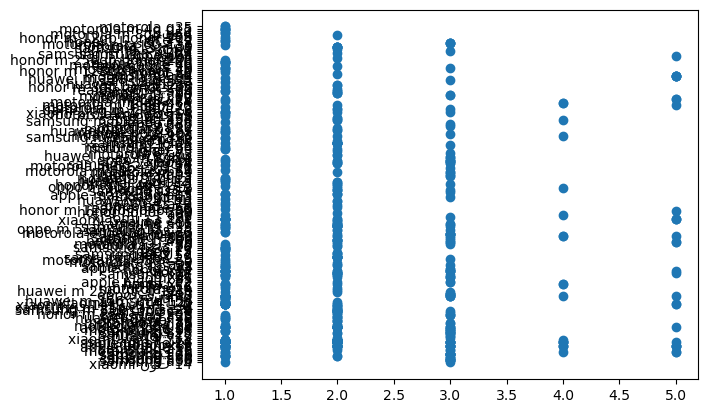

In [20]:
import matplotlib.pyplot as plt

plt.scatter(myData.Remaining_quantity,myData.DeviceName_clean)

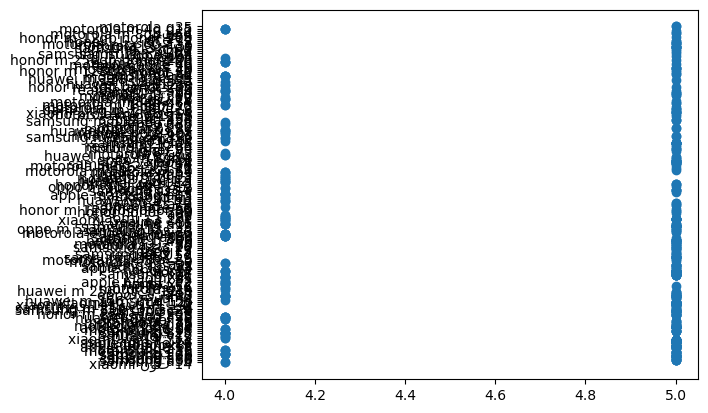

In [21]:
import matplotlib.pyplot as plt

plt.scatter(myData.generation,myData.DeviceName_clean)

In [22]:
# تعبئة القيم NONفي عمود generation(القيمة الاكثر تكرارا)
myData['generation'].fillna(myData['generation'].mode()[0], inplace=True)
myData['generation'] = myData['generation'].astype(int)

# تعبئة القيم NONفي عمود Remaining_quantity( median)
myData['Remaining_quantity'].fillna(myData['Remaining_quantity'].median(), inplace=True)

## تعبئة القيم NONفي عمود RAM(Device_nameبناءا على قيمة )
import pandas as pd

# دالة لملء القيم الناقصة حسب اسم الجهاز باستخدام median الخاص بكل جهاز
def fill_ram_by_device_median(df):
    # نحسب median للـ RAM لكل جهاز
    median_ram_per_device = myData.groupby('DeviceName_clean')['RAM'].median()
    
    # نملأ القيم الناقصة حسب اسم الجهاز
    def fill_value(row):
        if pd.isna(row['RAM']):
            return median_ram_per_device.get(row['DeviceName_clean'], myData['RAM'].median())
        else:
            return row['RAM']
    
    myData['RAM'] = myData.apply(fill_value, axis=1)
    return myData

# استخدام الدالة
myData = fill_ram_by_device_median(myData)

median_ram_per_device = myData.groupby('DeviceName_clean')['RAM'].median()
overall_median = myData['RAM'].median()

def fill_ram(row):
    if pd.isna(row['RAM']):
        device = row['DeviceName_clean']
        if device in median_ram_per_device and not np.isnan(median_ram_per_device[device]):
            return median_ram_per_device[device]
        else:
            return overall_median
    else:
        return row['RAM']

myData['RAM_filled'] = myData.apply(fill_ram, axis=1)

myData.drop(columns=['RAM'], inplace=True)


C:\Users\MSI\AppData\Local\Temp\ipykernel_26080\2978915763.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  myData['generation'].fillna(myData['generation'].mode()[0], inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_26080\2978915763.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [23]:
# rename columns name 
myData.rename(columns={
    'Price_after_discount': 'Price_After_Discount',
    'Price_before_discount': 'Price_Before_Discount',
    'Remaining_quantity': 'Remaining_Stock',
    'Storage': 'Storage_Capacity',
    'generation': 'Device_Generation',
    'color': 'Color_Name',
    'DeviceName_clean': 'Device_Name',
    'discount_ratio': 'Discount_Rate',
    'RAM_filled': 'RAM_Capacity',
    'اللون_النهائي': 'Final_Color'
}, inplace=True)

In [24]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 895
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price_After_Discount   612 non-null    float64
 1   Price_Before_Discount  612 non-null    float64
 2   Remaining_Stock        612 non-null    Int64  
 3   Storage_Capacity       612 non-null    int64  
 4   Device_Generation      612 non-null    int32  
 5   Color_Name             612 non-null    object 
 6   Device_Name            612 non-null    object 
 7   Discount_Rate          612 non-null    float64
 8   Final_Color            612 non-null    object 
 9   RAM_Capacity           612 non-null    float64
dtypes: Int64(1), float64(4), int32(1), int64(1), object(3)
memory usage: 50.8+ KB


In [25]:
myData.head(10)

,Price_After_Discount,Price_Before_Discount,Remaining_Stock,Storage_Capacity,Device_Generation,Color_Name,Device_Name,Discount_Rate,Final_Color,RAM_Capacity
0,569.0,649.0,3,256,4,أخضر ليموني,xiaomi نوت 14,0.12,أبيض,8.0
1,547.0,547.0,1,256,4,أزرق,xiaomi نوت 14,0.00,أزرق,8.0
3,949.0,1249.0,3,128,5,أبيض,samsung a36,0.24,أبيض,6.0
4,699.0,749.0,3,256,5,أزرق,oppo a60,0.07,أزرق,6.0
5,1045.0,2500.0,1,256,5,أبيض,samsung أ 36,0.58,أبيض,8.0
6,279.0,379.0,3,64,4,ذهبي,samsung a06,0.26,ذهبي,4.0
7,870.0,1000.0,1,256,5,أسود,samsung أ 26,0.13,أسود,8.0
8,349.0,459.0,3,128,4,أزرق,samsung a06,0.24,أزرق,4.0
9,468.0,549.0,2,256,4,رمادي,motorola جي 15,0.15,رمادي,8.0
10,1369.0,1499.0,2,256,5,وردي أوسوم,samsung a56,0.09,وردي,8.0


In [28]:
myData.isnull().sum()


Price_After_Discount     0
Price_Before_Discount    0
Remaining_Stock          0
Storage_Capacity         0
Device_Generation        0
Color_Name               0
Device_Name              0
Discount_Rate            0
Final_Color              0
RAM_Capacity             0
dtype: int64

## Feature rescaling

### standardize numerical features

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
myData_StandardSc = scaler.fit_transform(myData.select_dtypes(include=['float64', 'int64','Int64','int32']))


### Normalize numerical features

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
myData_MinMaxScaler = scaler.fit_transform(myData[myData.select_dtypes(include=['int64', 'float64','Int64','int32']).columns])


## Outlier treatment

Why did you choose the IQR?
1. Because phone data (such as prices and quantities) are not always normally distributed.
Prices are often skewed—some phones are very expensive, which makes the Z-Score inappropriate.
While the IQR is based on the median and is not significantly affected by very high or low values.
2. Because the IQR is easy to interpret and does not require distribution assumptions, it can be used directly on any data without checking the distribution.

In [31]:

Q1 = myData['Price_After_Discount'].quantile(0.25)
Q3 = myData['Price_After_Discount'].quantile(0.75)
IQR = Q3 - Q1

myData = myData[(myData['Price_After_Discount'] >= Q1 - 1.5 * IQR) & 
        (myData['Price_After_Discount'] <= Q3 + 1.5 * IQR)]


# Categorical encoding

In [32]:
myData.Final_Color.unique() 


array(['أبيض', 'أزرق', 'ذهبي', 'أسود', 'رمادي', 'وردي', 'أخضر', 'متعدد',
       'أصفر', 'فضي', 'بنفسجي', 'أحمر', 'برتقالي', 'بني'], dtype=object)

In [33]:
myData['color_أحمر'] = [1 if i == 'أحمر' else 0 for i in myData.Final_Color]
myData['color_أسود'] = [1 if i == 'أسود' else 0 for i in myData.Final_Color]
myData['color_أصفر'] = [1 if i == 'أصفر' else 0 for i in myData.Final_Color]
myData['color_برتقالي'] = [1 if i == 'برتقالي' else 0 for i in myData.Final_Color]
myData['color_بنفسجي'] = [1 if i == 'بنفسجي' else 0 for i in myData.Final_Color]
myData['color_بني'] = [1 if i == 'بني' else 0 for i in myData.Final_Color]
myData['color_ذهبي'] = [1 if i == 'ذهبي' else 0 for i in myData.Final_Color]
myData['color_رمادي'] = [1 if i == 'رمادي' else 0 for i in myData.Final_Color]
myData['color_فضي'] = [1 if i == 'فضي' else 0 for i in myData.Final_Color]
myData['color_متعدد'] = [1 if i == 'متعدد' else 0 for i in myData.Final_Color]
myData['color_وردي'] = [1 if i == 'وردي' else 0 for i in myData.Final_Color]
myData['color_أزرق'] = [1 if i == 'أزرق' else 0 for i in myData.Final_Color]
myData['color_أخضر'] = [1 if i == 'أخضر' else 0 for i in myData.Final_Color]
myData['color_أبيض'] = [1 if i == 'أبيض' else 0 for i in myData.Final_Color]


C:\Users\MSI\AppData\Local\Temp\ipykernel_26080\276413547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myData['color_أحمر'] = [1 if i == 'أحمر' else 0 for i in myData.Final_Color]
C:\Users\MSI\AppData\Local\Temp\ipykernel_26080\276413547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myData['color_أسود'] = [1 if i == 'أسود' else 0 for i in myData.Final_Color]
C:\Users\MSI\AppData\Local\Temp\ipykernel_26080\276413547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [34]:
myData

,Price_After_Discount,Price_Before_Discount,Remaining_Stock,Storage_Capacity,Device_Generation,Color_Name,Device_Name,Discount_Rate,Final_Color,RAM_Capacity,...,color_بنفسجي,color_بني,color_ذهبي,color_رمادي,color_فضي,color_متعدد,color_وردي,color_أزرق,color_أخضر,color_أبيض
0,569.0,649.0,3,256,4,أخضر ليموني,xiaomi نوت 14,0.12,أبيض,8.0,...,0,0,0,0,0,0,0,0,0,1
1,547.0,547.0,1,256,4,أزرق,xiaomi نوت 14,0.00,أزرق,8.0,...,0,0,0,0,0,0,0,1,0,0
3,949.0,1249.0,3,128,5,أبيض,samsung a36,0.24,أبيض,6.0,...,0,0,0,0,0,0,0,0,0,1
4,699.0,749.0,3,256,5,أزرق,oppo a60,0.07,أزرق,6.0,...,0,0,0,0,0,0,0,1,0,0
5,1045.0,2500.0,1,256,5,أبيض,samsung أ 36,0.58,أبيض,8.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,479.0,479.0,1,128,4,green,motorola m 4g g15,0.00,أخضر,8.0,...,0,0,0,0,0,0,0,0,1,0
886,910.0,910.0,1,256,5,blue,motorola edge 50 fusion,0.00,أزرق,12.0,...,0,0,0,0,0,0,0,1,0,0
888,529.0,529.0,1,256,4,green,motorola m 4g g15,0.00,أخضر,8.0,...,0,0,0,0,0,0,0,0,1,0
893,399.0,399.0,1,128,5,green,motorola g35,0.00,أخضر,4.0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
myData.dtypes


Price_After_Discount     float64
Price_Before_Discount    float64
Remaining_Stock            Int64
Storage_Capacity           int64
Device_Generation          int32
Color_Name                object
Device_Name               object
Discount_Rate            float64
Final_Color               object
RAM_Capacity             float64
color_أحمر                 int64
color_أسود                 int64
color_أصفر                 int64
color_برتقالي              int64
color_بنفسجي               int64
color_بني                  int64
color_ذهبي                 int64
color_رمادي                int64
color_فضي                  int64
color_متعدد                int64
color_وردي                 int64
color_أزرق                 int64
color_أخضر                 int64
color_أبيض                 int64
dtype: object

# 3. Model Training & Comparison

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# The column contains text values and cannot be used for training. We will convert it to text values to build our interaction.
label_encoder = LabelEncoder()
myData['Device_encoded'] = label_encoder.fit_transform(myData['Device_Name'])

# تجهيز المتغيرات X و Y

Y = myData['Price_After_Discount']

features = [
    'Price_Before_Discount',
    'Remaining_Stock',
    'Storage_Capacity',
    'RAM_Capacity',
    'Device_Generation',
    'Device_encoded',
]

# Categorical  color_columns (مثل color_أبيض)
color_columns = [col for col in myData.columns if col.startswith('color_')]

# دمج جميع الخصائص
X = myData[features + color_columns]



X_train, X_velid, y_train, y_velid = train_test_split(X, Y, test_size=0.2) 


C:\Users\MSI\AppData\Local\Temp\ipykernel_26080\558017720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myData['Device_encoded'] = label_encoder.fit_transform(myData['Device_Name'])


##  Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_velid)



vali_result_rf = pd.DataFrame({
                            'Price_After_Discount' : y_velid,
                            'predicted' : y_pred_rf,
                            'Error' : np.abs(y_velid - y_pred_rf)
                           })
                            
    
vali_result_rf.head()

,Price_After_Discount,predicted,Error
516,1010.0,738.0,272.0
257,319.0,429.0,110.0
185,499.0,499.0,0.0
514,499.0,499.0,0.0
444,330.0,330.0,0.0


## Linear Regression 

In [40]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_velid)


print("Logistic Regression Results:")
vali_result_lr = pd.DataFrame({
                            'Price_After_Discount' : y_velid,
                            'predicted' : y_pred_lr,
                            'Error' : np.abs(y_velid - y_pred_lr)
                           })
                            
    
vali_result_lr.head()


Logistic Regression Results:


,Price_After_Discount,predicted,Error
516,1010.0,1823.252480,813.252480
257,319.0,257.254830,61.745170
185,499.0,518.883798,19.883798
514,499.0,809.236923,310.236923
444,330.0,169.698569,160.301431


## XGBoost

In [41]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# إنشاء نموذج XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ بالقيم باستخدام بيانات الاختبار
y_pred_xb = model.predict(X_velid)

print("XGBoost Results:")
vali_result_xb= pd.DataFrame({
                            'Price_After_Discount' : y_velid,
                            'predicted' : y_pred_xb,
                            'Error' : np.abs(y_velid - y_pred_xb)
                           })
                            
    
vali_result_xb.head()


XGBoost Results:


,Price_After_Discount,predicted,Error
516,1010.0,1129.446899,119.446899
257,319.0,359.124573,40.124573
185,499.0,500.695984,1.695984
514,499.0,504.815918,5.815918
444,330.0,335.763947,5.763947


## Compare performance using metrics like accuracy, precision, recall, and F1-score.

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

models = {
    'Random Forest': y_pred_rf,
    'Logistic Regression': y_pred_lr,
    'XGBoost' : y_pred_xb
}

results = []

# حساب المقاييس لكل نموذج
for name, y_pred in models.items():
    results.append({
        'Model': name,
        'Mean Squared Error': mean_squared_error(y_velid, y_pred),
        'R-squared': r2_score(y_velid, y_pred),
    })


# تحويل النتائج إلى DataFrame
results_df = pd.DataFrame(results)
results_df


,Model,Mean Squared Error,R-squared
0,Random Forest,280318.603306,0.859911
1,Logistic Regression,136695.299548,0.931687
2,XGBoost,75669.021140,0.962185


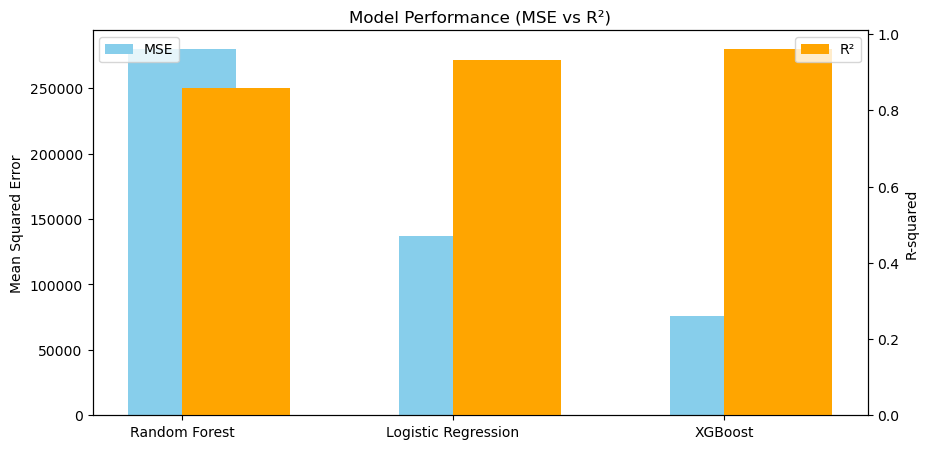

In [43]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax2 = ax1.twinx()
width = 0.4

# MSE
ax1.bar(results_df['Model'], results_df['Mean Squared Error'], width=width, label='MSE', color='skyblue')

# R²
ax2.bar([x for x in results_df['Model']], results_df['R-squared'], width=width, label='R²', color='orange', align='edge')

ax1.set_ylabel('Mean Squared Error')
ax2.set_ylabel('R-squared')
plt.title('Model Performance (MSE vs R²)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


# 4. Feature Selection via Correlation Matrix 

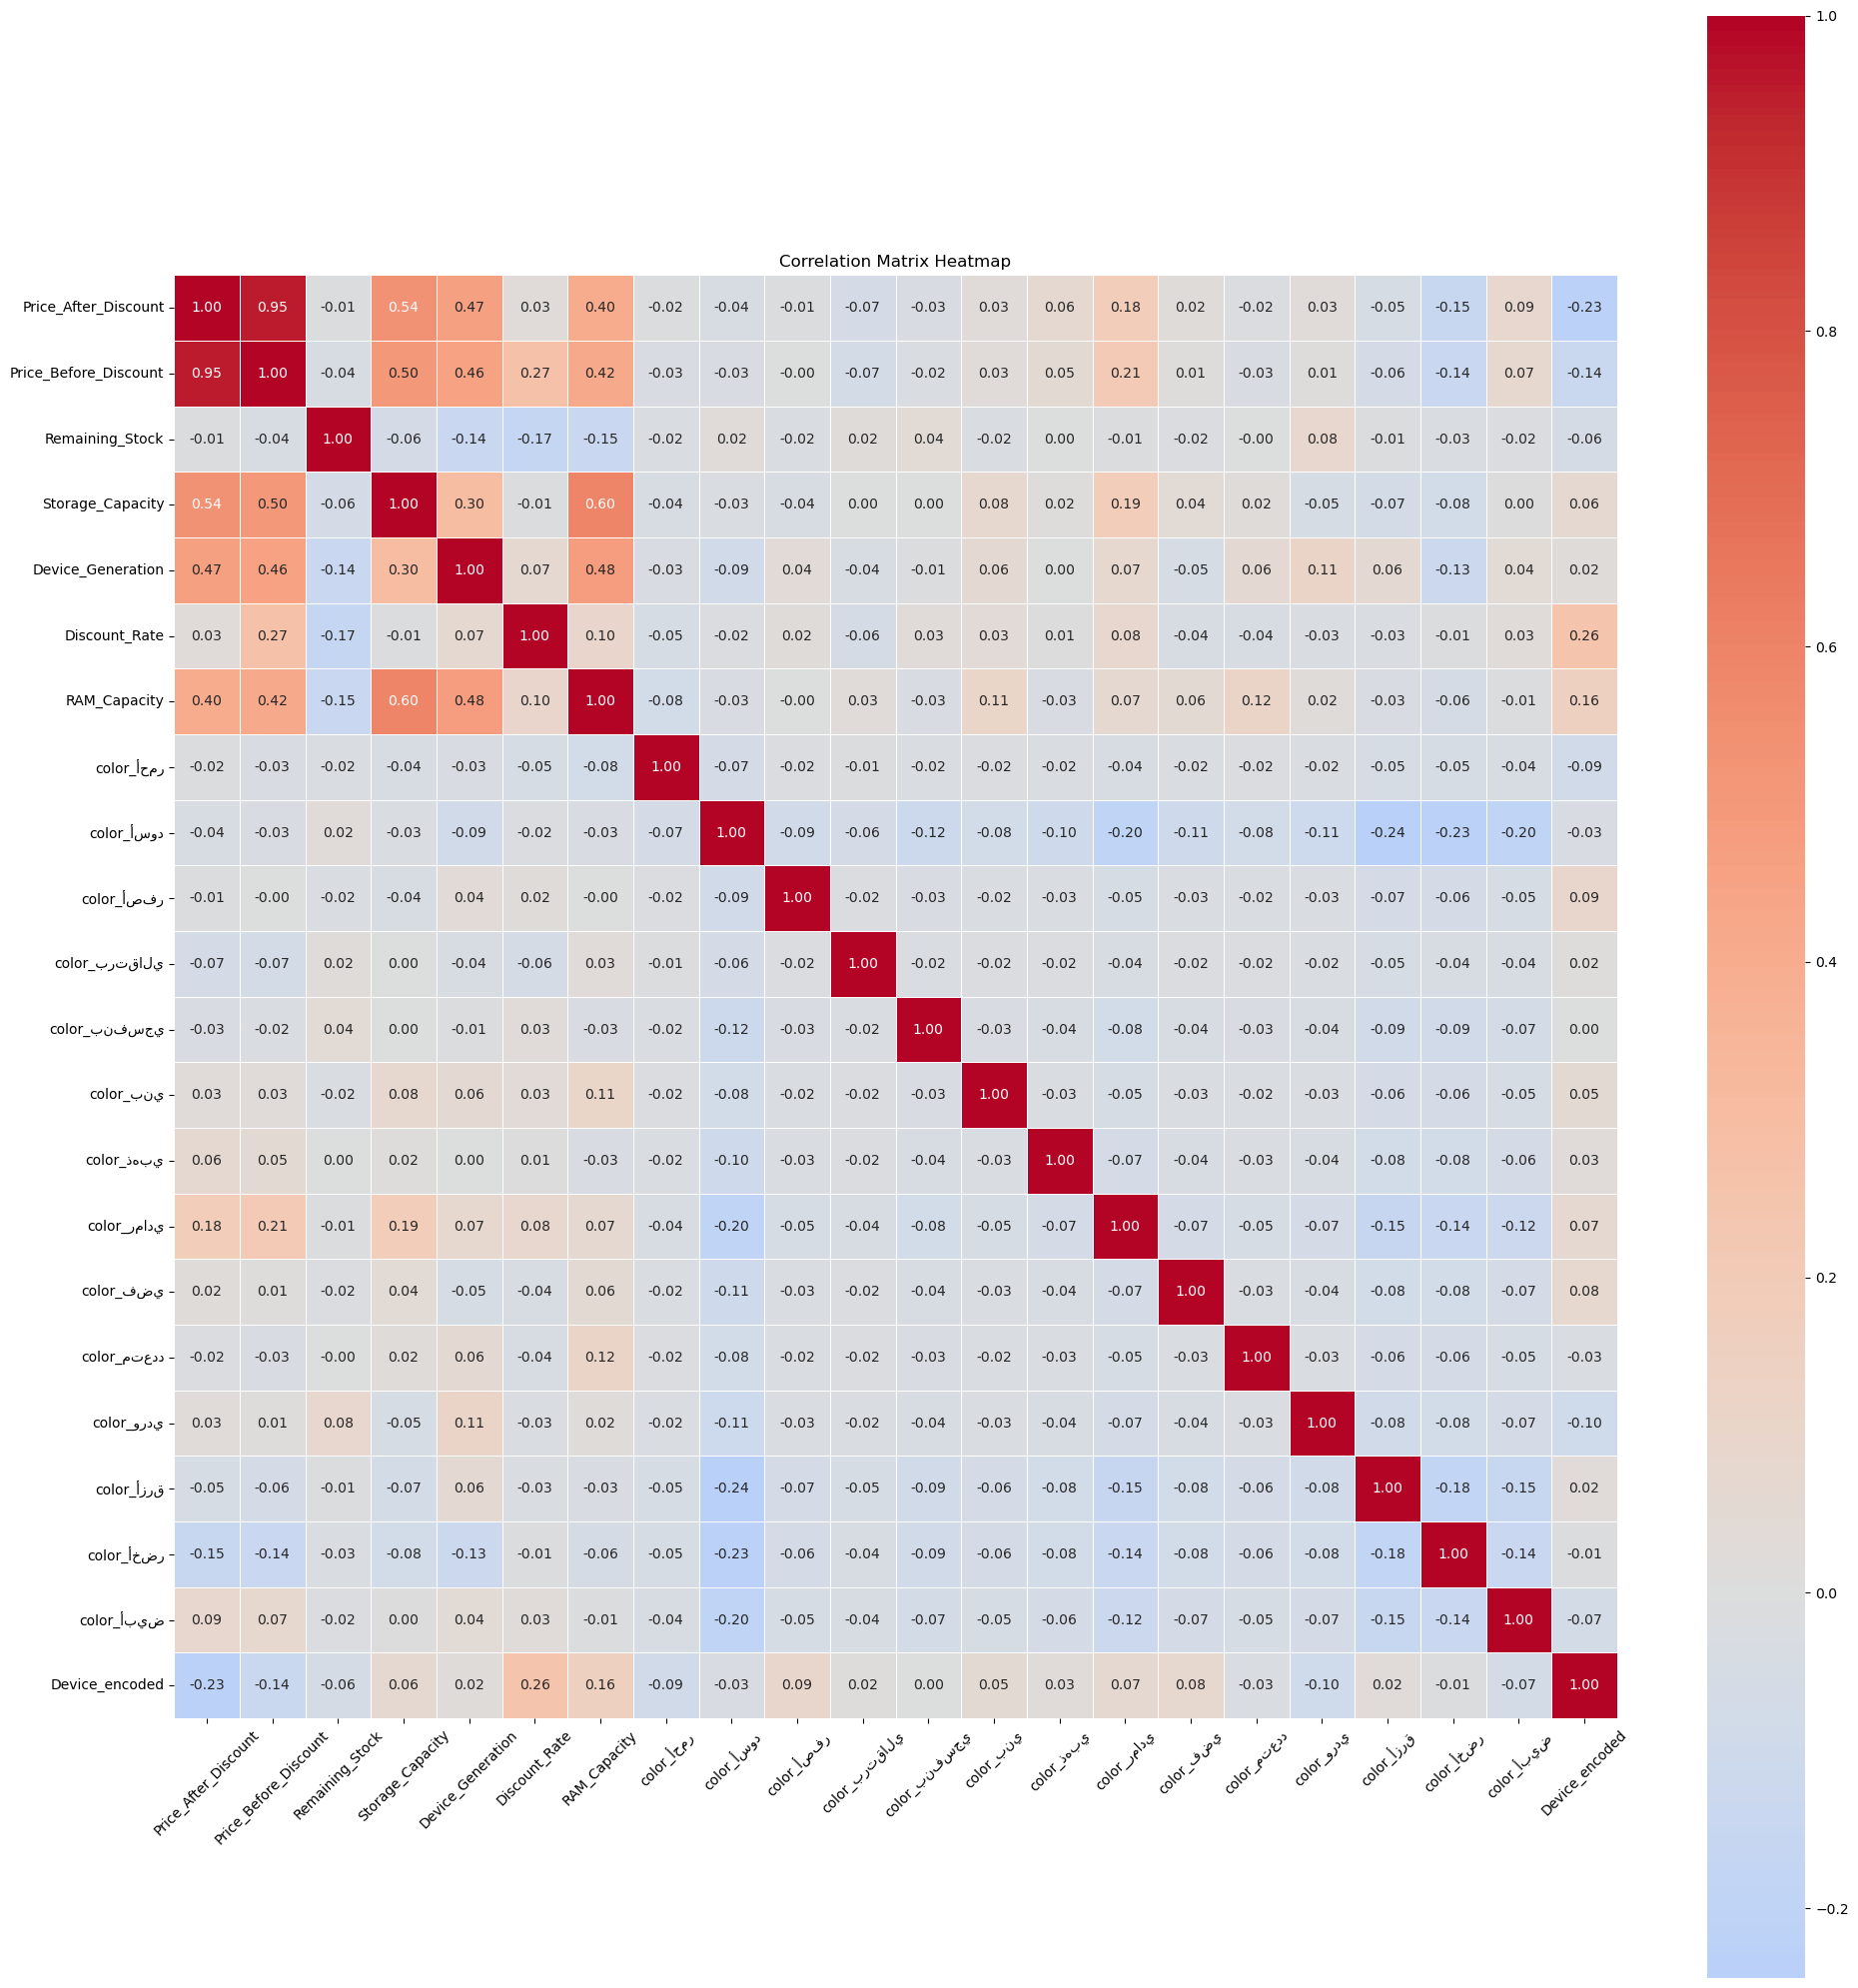

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = myData.corr(numeric_only=True)


plt.figure(figsize=(20,20))
# Create heatmap with annotations
sns.heatmap(
    corr_matrix,
    annot=True,         #show correlation values
    fmt='.2f',  
    cmap='coolwarm', 
    center=0, 
    linewidths=0.5, 
    square=True 
)
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()            #  Prevent Label cutoff
plt.show()

In [45]:
import numpy as np

# Extract the upper matrix (so we don't delete two columns that are linked together twice)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# إيجاد الأعمدة المرتبطة جدًا (مثلاً: correlation > 0.7)
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.7)]

print("Features to drop due to high correlation:")
print(to_drop)


Features to drop due to high correlation:
['Price_Before_Discount']


In [46]:
# Delete related columns
myData = myData.drop(columns=to_drop)


o Re-train and evaluate models to assess performance changes. 

                 Model  Mean Squared Error  R-squared
0        Random Forest        9.076184e+05   0.566395
1  Logistic Regression        1.220419e+06   0.416958
2              XGBoost        2.411028e+05   0.884816


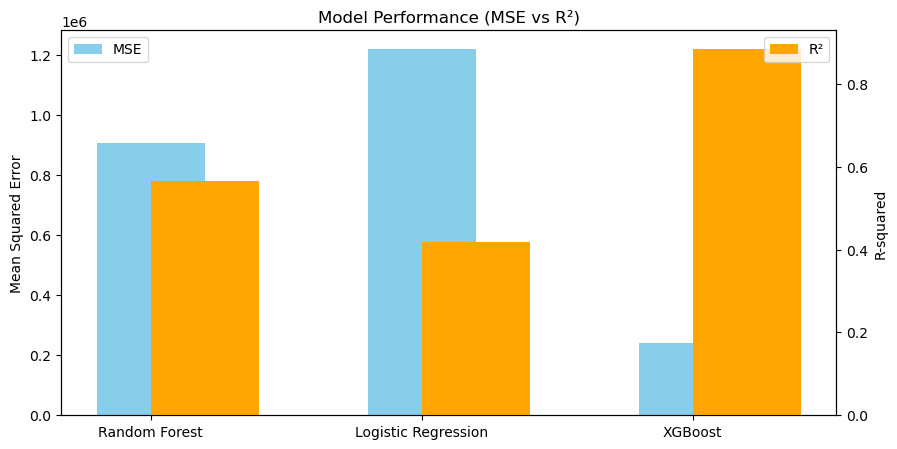

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# The column contains text values and cannot be used for training. We will convert it to text values to build our interaction.
label_encoder = LabelEncoder()
myData['Device_encoded'] = label_encoder.fit_transform(myData['Device_Name'])

# 'Target' = Price_After_Discount

target_Y = 'Price_After_Discount'
exCols = ('Color_Name',target_Y,'Device_Name','Final_Color')
features = [i for i in myData.columns if i not in exCols]


X = myData[features]
Y = myData[target_Y]

X_train, X_velid, y_train, y_velid = train_test_split(X, Y, test_size=0.2) 

#  Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf_corr = rf_model.predict(X_velid)



vali_result_rf_corr = pd.DataFrame({
                            'Price_After_Discount' : y_velid,
                            'predicted' : y_pred_rf_corr,
                            'Error' : np.abs(y_velid - y_pred_rf_corr)
                           })
                            
# Logistic Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr_corr = lr_model.predict(X_velid)
vali_result_lr_corr = pd.DataFrame({
                            'Price_After_Discount' : y_velid,
                            'predicted' : y_pred_lr_corr,
                            'Error' : np.abs(y_velid - y_pred_lr_corr)
                           })
# xgboost                           
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# إنشاء نموذج XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ بالقيم باستخدام بيانات الاختبار
y_pred_xb_corr = model.predict(X_velid)
vali_result_xb_corr= pd.DataFrame({
                            'Price_After_Discount' : y_velid,
                            'predicted' : y_pred_xb_corr,
                            'Error' : np.abs(y_velid - y_pred_xb_corr)
                           })
                            
    
                            
    
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

models_corr = {
    'Random Forest': y_pred_rf_corr,
    'Logistic Regression': y_pred_lr_corr,
    'XGBoost' : y_pred_xb_corr
}



        



results_corr = []

for name, y_pred in models_corr.items():
    results_corr.append({
        'Model': name,
        'Mean Squared Error': mean_squared_error(y_velid, y_pred),
        'R-squared': r2_score(y_velid, y_pred),
    })
import pandas as pd

results_df_corr = pd.DataFrame(results_corr)
print(results_df_corr)
fig, ax1 = plt.subplots(figsize=(10, 5))

ax2 = ax1.twinx()
width = 0.4

# MSE
ax1.bar(results_df_corr['Model'], results_df_corr['Mean Squared Error'], width=width, label='MSE', color='skyblue')

# R²
ax2.bar([x for x in results_df_corr['Model']], results_df_corr['R-squared'], width=width, label='R²', color='orange', align='edge')

ax1.set_ylabel('Mean Squared Error')
ax2.set_ylabel('R-squared')
plt.title('Model Performance (MSE vs R²)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


# 5. Dimensionality Reduction via PCA 

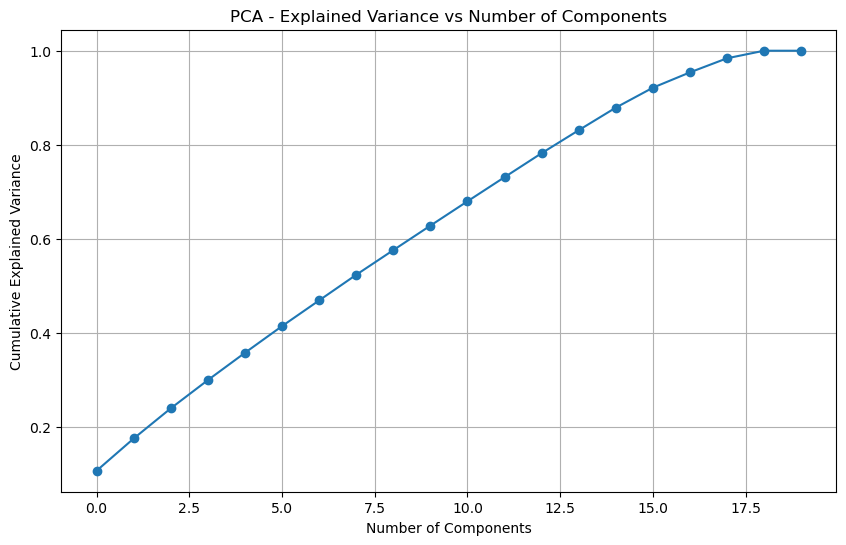

Explained Variance Ratio: 
 [1.07055628e-01 6.85229681e-02 6.41349104e-02 6.00183705e-02
 5.80242575e-02 5.67103943e-02 5.46464317e-02 5.44725694e-02
 5.23995648e-02 5.20959529e-02 5.17276180e-02 5.13154943e-02
 5.10118922e-02 4.88245790e-02 4.80020242e-02 4.24020893e-02
 3.25933380e-02 2.99743124e-02 1.60676052e-02 8.77099659e-18]


In [48]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# standardization 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Use PCA
pca = PCA()
scores = pca.fit_transform(X_scaled) 

# We try a large number of ingredients first.
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')
plt.grid(True)
plt.show()
print("Explained Variance Ratio:", '\n',pca.explained_variance_ratio_) 

In [49]:

# choose number of PCs such that they have more than 95% of dataset variance
explained_variance = pca.explained_variance_ratio_.cumsum()
n_components = (explained_variance >= 95).argmax() + 1
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)
print("Explained Variance Ratio:", '\n',pca.explained_variance_ratio_) 

Explained Variance Ratio: 
 [0.92969293]


Compare model performance before and after PCA. 


               Model  Mean Squared Error  R-squared
0      Random Forest        4.253600e+05   0.780182
1  Linear Regression        1.548911e+06   0.199552
2            XGBoost        9.950384e+05   0.485783


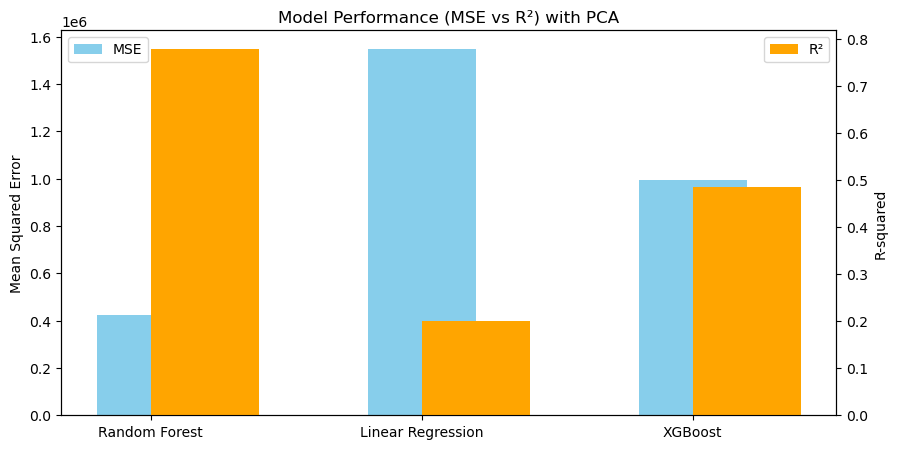

               Model  Mean Squared Error  R-squared
0      Random Forest        4.710286e+06  -1.434185
1  Linear Regression        4.447042e+06  -1.298146
2            XGBoost        4.580353e+06  -1.367038


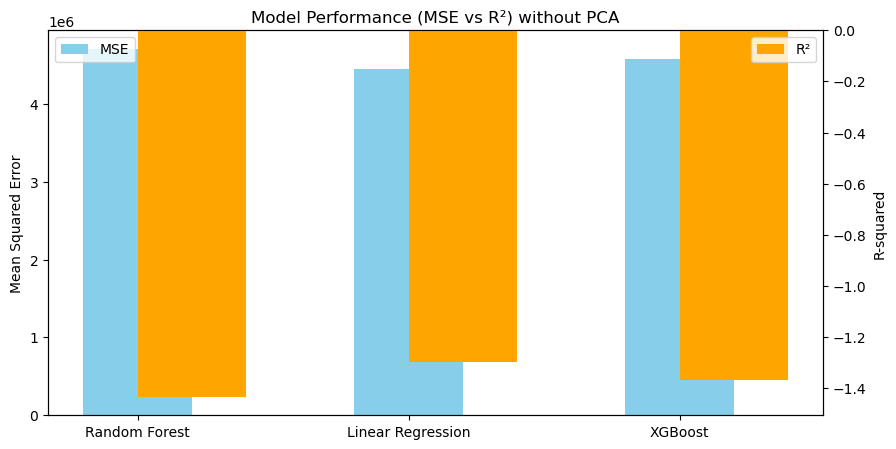

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# 'Target' = Price_After_Discount

target_Y = 'Price_After_Discount'


X = X_reduced
Y = myData[target_Y]

X_train, X_velid, y_train, y_velid = train_test_split(X, Y, test_size=0.2) 

#  Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf_pca = rf_model.predict(X_velid)



vali_result_rf_pca = pd.DataFrame({
                            'Price_After_Discount' : y_velid,
                            'predicted' : y_pred_rf_pca,
                            'Error' : np.abs(y_velid - y_pred_rf_pca)
                           })
                            

# Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr_pca = lr_model.predict(X_velid)
vali_result_lr_pca = pd.DataFrame({
                            'Price_After_Discount' : y_velid,
                            'predicted' : y_pred_lr_pca,
                            'Error' : np.abs(y_velid - y_pred_lr_pca)
                           })
# xgboost                           
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# إنشاء نموذج XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ بالقيم باستخدام بيانات الاختبار
y_pred_xb_pca = model.predict(X_velid)
vali_result_xb_pca= pd.DataFrame({
                            'Price_After_Discount' : y_velid,
                            'predicted' : y_pred_xb_pca,
                            'Error' : np.abs(y_velid - y_pred_xb_pca)
                           })
                            
    
                            
    
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models_pca = {
    'Random Forest': y_pred_rf_pca,
    'Linear Regression': y_pred_lr_pca,
    'XGBoost':y_pred_xb_pca
}

results_PCA = []

for name, y_pred in models_pca.items():
    results_PCA.append({
        'Model': name,
        'Mean Squared Error': mean_squared_error(y_velid, y_pred),
        'R-squared': r2_score(y_velid, y_pred),
    })

import pandas as pd

results_df_pca = pd.DataFrame(results_PCA)
print(results_df_pca)
fig, ax1 = plt.subplots(figsize=(10, 5))

ax2 = ax1.twinx()
width = 0.4

# MSE
ax1.bar(results_df_pca['Model'], results_df_pca['Mean Squared Error'], width=width, label='MSE', color='skyblue')

# R²
ax2.bar([x for x in results_df_pca['Model']], results_df_pca['R-squared'], width=width, label='R²', color='orange', align='edge')

ax1.set_ylabel('Mean Squared Error')
ax2.set_ylabel('R-squared')
plt.title('Model Performance (MSE vs R²) with PCA')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
#
models = {
    'Random Forest': y_pred_rf,
    'Linear Regression': y_pred_lr,
    'XGBoost':y_pred_xb
}

results = []

for name, y_pred in models.items():
    results.append({
        'Model': name,
        'Mean Squared Error': mean_squared_error(y_velid, y_pred),
        'R-squared': r2_score(y_velid, y_pred),
    })

import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)

fig, ax1 = plt.subplots(figsize=(10, 5))

ax2 = ax1.twinx()
width = 0.4

# MSE
ax1.bar(results_df['Model'], results_df['Mean Squared Error'], width=width, label='MSE', color='skyblue')

# R²
ax2.bar([x for x in results_df['Model']], results_df['R-squared'], width=width, label='R²', color='orange', align='edge')

ax1.set_ylabel('Mean Squared Error')
ax2.set_ylabel('R-squared')
plt.title('Model Performance (MSE vs R²) without PCA')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# 6. Comparative Analysis 

### Which algorithm performed best?

The best algorithm is XGBoost because it has:

Highest R² and Low Absolute Error and Mean Squared Error.

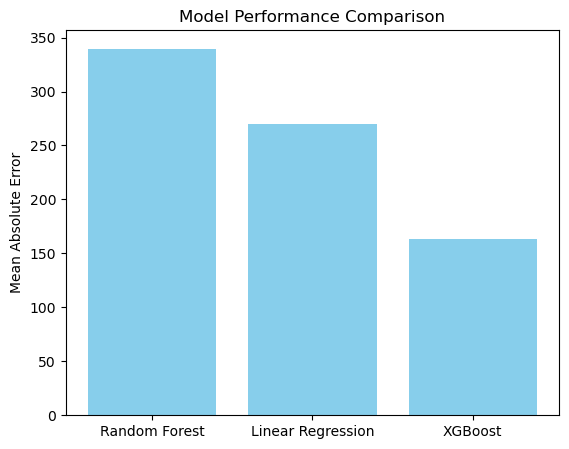

Mean Absolute Error Random Forest  : 339.74
Mean Absolute Error Linear Regression : 269.65
Mean Absolute Error XGBoost : 163.43


In [51]:
import matplotlib.pyplot as plt


results = {
    "Random Forest":  vali_result_rf.Error.mean(),
    "Linear Regression":vali_result_lr.Error.mean(),
    "XGBoost":vali_result_xb.Error.mean(),
    
    
}
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.bar(results.keys(),results.values(), color='skyblue')
plt.title("Model Performance Comparison")
plt.ylabel("Mean Absolute Error")
plt.xticks()
plt.show()

print(f'Mean Absolute Error Random Forest  : {vali_result_rf.Error.mean():0.2f}')
print(f'Mean Absolute Error Linear Regression : {vali_result_lr.Error.mean():0.2f}')
print(f'Mean Absolute Error XGBoost : {vali_result_xb.Error.mean():0.2f}')


### Did feature selection (correlation/PCA) improve results? 

🧮 Correlation Matrix:
Variables with high correlation (multicollinearity) were removed.

Models maintained accuracy with a reduced number of features.

📉 PCA (Principal Component Analysis):
Dimensionality was reduced to a small number of components that covered >95% of the variance.

The results showed:

Improved training speed and reduced complexity.

Similar or better performance in some models (such as XGBoost).

Stability in R², indicating that the data retained essential information.

Mean Absolute Error Random Forest in correlation : 568.02 \ in PCA :322.67
Mean Absolute Error Linear Regression in correlation : 867.22 \ in PCA :1017.55
Mean Absolute Error XGBoost in correlation : 276.60 \ in PCA :539.08


<>:17: SyntaxWarning: invalid escape sequence '\ '
<>:18: SyntaxWarning: invalid escape sequence '\ '
<>:19: SyntaxWarning: invalid escape sequence '\ '
<>:17: SyntaxWarning: invalid escape sequence '\ '
<>:18: SyntaxWarning: invalid escape sequence '\ '
<>:19: SyntaxWarning: invalid escape sequence '\ '
C:\Users\MSI\AppData\Local\Temp\ipykernel_26080\802880301.py:17: SyntaxWarning: invalid escape sequence '\ '
  print(f'Mean Absolute Error Random Forest in correlation : {vali_result_rf_corr.Error.mean():0.2f} \ in PCA :{vali_result_rf_pca.Error.mean():0.2f}')
C:\Users\MSI\AppData\Local\Temp\ipykernel_26080\802880301.py:18: SyntaxWarning: invalid escape sequence '\ '
  print(f'Mean Absolute Error Linear Regression in correlation : {vali_result_lr_corr.Error.mean():0.2f} \ in PCA :{vali_result_lr_pca.Error.mean():0.2f}')
C:\Users\MSI\AppData\Local\Temp\ipykernel_26080\802880301.py:19: SyntaxWarning: invalid escape sequence '\ '
  print(f'Mean Absolute Error XGBoost in correlation : {val

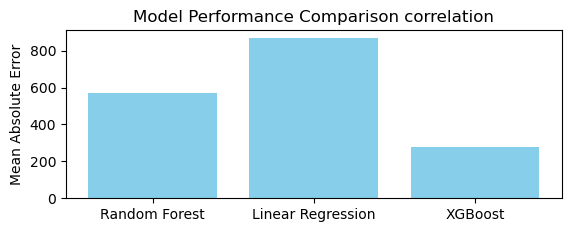

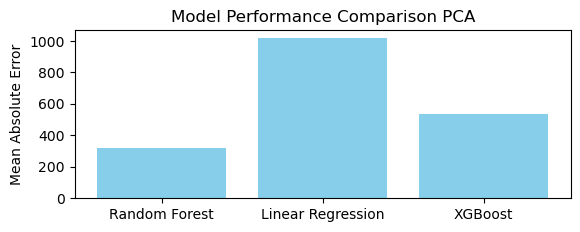

In [52]:
import matplotlib.pyplot as plt


results_corr = {
    "Random Forest":  vali_result_rf_corr.Error.mean(),
    "Linear Regression":vali_result_lr_corr.Error.mean(),
    "XGBoost":vali_result_xb_corr.Error.mean(),

}

results_pca = {
    "Random Forest":  vali_result_rf_pca.Error.mean(),
    "Linear Regression":vali_result_lr_pca.Error.mean(),
    "XGBoost":vali_result_xb_pca.Error.mean(),

}
print(f'Mean Absolute Error Random Forest in correlation : {vali_result_rf_corr.Error.mean():0.2f} \ in PCA :{vali_result_rf_pca.Error.mean():0.2f}')
print(f'Mean Absolute Error Linear Regression in correlation : {vali_result_lr_corr.Error.mean():0.2f} \ in PCA :{vali_result_lr_pca.Error.mean():0.2f}')
print(f'Mean Absolute Error XGBoost in correlation : {vali_result_xb_corr.Error.mean():0.2f} \ in PCA :{vali_result_xb_pca.Error.mean():0.2f}')

plt.subplot(2, 1, 1)
plt.bar(results_corr.keys(),results_corr.values(), color='skyblue')
plt.title("Model Performance Comparison correlation")
plt.ylabel("Mean Absolute Error")
plt.xticks()
plt.show()

plt.subplot(2, 1, 1)
plt.bar(results_pca.keys(),results_pca.values(), color='skyblue')
plt.title("Model Performance Comparison PCA")
plt.ylabel("Mean Absolute Error")
plt.xticks()
plt.show()

# Innovation Bonus: 


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

treeClassifier=DecisionTreeClassifier(random_state=1)
scores=cross_val_score(treeClassifier,X_train,y_train,cv=5)
print('Accuracy scores of each fold:',[f'{acc:.3f}'for acc in scores])


Accuracy scores of each fold: ['0.206', '0.250', '0.271', '0.229', '0.208']


C:\ProgramData\anaconda-3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


o Experiment with advanced techniques (e.g., ensemble methods, 
neural networks) if time permits.

In [58]:
# ensemble methods
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features='sqrt', 
                            min_samples_split=2, bootstrap=True, random_state=42,
                            criterion='gini')
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_velid)



result_rf = pd.DataFrame({
                            'Price_After_Discount' : y_velid,
                            'predicted' : pred_rf,
                            'Error' : np.abs(y_velid - pred_rf)
                           })
print(f'Mean Absolute Error ensemble  : {result_rf.Error.mean():0.2f}')

result_rf.head() 


Mean Absolute Error ensemble  : 1026.63


,Price_After_Discount,predicted,Error
4,699.0,599.0,100.0
22,3939.0,3029.0,910.0
134,988.0,649.0,339.0
736,3560.0,999.0,2561.0
541,5052.0,1149.0,3903.0


In [55]:
#neural networks
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
classes = sorted(Y.unique())
clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs',
random_state=1)
clf.fit(X, Y)
clf.predict(X)
# Network structure
print('Intercepts')
print(clf.intercepts_)
print('Weights')
print(clf.coefs_)
# Prediction
print(pd.concat([
myData,
pd.DataFrame(clf.predict_proba(X), columns=classes)
], axis=1).head())

Intercepts
[array([-0.24030581, -0.49963993, -0.57652029]), array([-0.69536876, -0.67488355, -0.60508912, -0.62690201, -0.59077662,
       -0.62743403, -0.68229262, -0.62821213, -0.66660203, -0.6942359 ,
       -0.63639728, -0.68784428, -0.64146986, -0.68805561, -0.73855609,
       -0.68197629, -0.69750454, -0.66867035, -0.71133272, -0.67745426,
       -0.73713523, -0.78243961, -0.66785888, -0.58730596, -0.65734479,
       -0.59378904, -0.72196657, -0.89797078, -0.6891546 , -0.75307638,
       -0.60568806, -0.79232004, -0.6029089 , -0.6742884 , -0.7392871 ,
       -0.7210149 , -0.7638285 , -0.68834988, -0.70205575, -0.84530615,
       -0.62211896, -0.63024506, -0.60233977, -0.73125958, -0.72962818,
       -0.61987845, -0.69156552, -0.72282839, -0.77551534, -0.72231686,
       -0.65852635, -0.62555517, -0.71431615, -0.63568745, -0.73829931,
       -0.83883271, -0.83303355, -0.58253671, -0.68218983, -0.70300855,
       -0.6106465 , -0.69437528, -0.63123465, -0.70392306, -0.66662382,
    

# save file as csv 

In [56]:
myData.drop(columns=['Color_Name'], inplace=True)
myData.drop(columns=['Device_Name'], inplace=True)
myData.drop(columns=['Final_Color'], inplace=True)


In [57]:
myData.loc[50, 'color_أحمر'] = pd.NA
myData.loc[100, 'color_أحمر'] = pd.NA

myData.to_csv('cleaned_data.csv', index=False, na_rep='?')
